In [1]:
%run ../cube/Cube.ipynb

Support algs imported!
Cube initiated


In [2]:
from PIL import Image

In [3]:
def create_canvas():
    # Create a black canvas with a size of 32x16
    canvas = Image.new("RGBA", (32, 16), color=(0, 0, 0, 255))

    # Create a transparent 8x8 area in the top right
    transparent_region = Image.new("RGBA", (8, 8), color=(0, 0, 0, 0))
    canvas.paste(transparent_region, (24, 0))

    # Create a transparent 8x8 area in the top left
    canvas.paste(transparent_region, (0, 0))

    return canvas


In [4]:
def paste_tile(image, x1, y1, x2, y2, tiles_path = "tiles.png"):
    # Open the tiles image
    tiles_image = Image.open(tiles_path)

    # Extract a 2x2 tile from the tiles image
    tile = tiles_image.crop((x1, y1, x1+2, y1+2))

    # Paste the tile onto the image object at coordinates [x2:x2+2, y2:y2+2]
    image.paste(tile, (x2, y2, x2+2, y2+2))

    # Return the modified image
    return image

In [5]:
index_to_position = {
    # index: [x,y]
    0: [8,8],
    1: [11,8],
    2: [14,8],
    3: [8,11],
    4: [11,11],
    5: [14,11],
    6: [8,14],
    7: [11,14],
    8: [14,14],
    
    9: [16,8],
    10: [19,8],
    11: [22,8],
    12: [16,11],
    13: [19,11],
    14: [22,11],
    15: [16,14],
    16: [19,14],
    17: [22,14],
    
    18: [24,8],
    19: [27,8],
    20: [30,8],
    21: [24,11],
    22: [27,11],
    23: [30,11],
    24: [24,14],
    25: [27,14],
    26: [30,14],
    
    27: [0,8],
    28: [3,8],
    29: [6,8],
    30: [0,11],
    31: [3,11],
    32: [6,11],
    33: [0,14],
    34: [3,14],
    35: [6,14],
    
    36: [8,0],
    37: [11,0],
    38: [14,0],
    39: [8,3],
    40: [11,3],
    41: [14,3],
    42: [8,6],
    43: [11,6],
    44: [14,6],
    
    45: [16,6],
    46: [19,6],
    47: [22,6],
    48: [16,3],
    49: [19,3],
    50: [22,3],
    51: [16,0],
    52: [19,0],
    53: [22,0],
}

In [6]:
index_to_type = {
    # index: index of color
    0: 1,
    1: 2,
    2: 3,
    3: 1,
    4: 2,
    5: 3,
    6: 1,
    7: 2,
    8: 3,
    
    9: 1,
    10: 1,
    11: 1,
    12: 1,
    13: 1,
    14: 1,
    15: 1,
    16: 1,
    17: 1,
    
    18: 1,
    19: 2,
    20: 3,
    21: 1,
    22: 2,
    23: 3,
    24: 1,
    25: 2,
    26: 3,
    
    27: 3,
    28: 3,
    29: 3,
    30: 3,
    31: 3,
    32: 3,
    33: 3,
    34: 3,
    35: 3,
    
    36: 1,
    37: 1,
    38: 3,
    39: 4,
    40: 4,
    41: 5,
    42: 4,
    43: 4,
    44: 5,
    
    45: 6,
    46: 6,
    47: 6,
    48: 6,
    49: 6,
    50: 6,
    51: 6,
    52: 6,
    53: 6,
}

In [7]:
def color_and_type_to_coords(color,square_type):
    # color, square_type are ints between 1 and 6
    y = 2*(color-1)
    x = 2*(square_type-1)
    return x,y

In [8]:
def cube_to_minecraft(cube):
    # takes a cube produces a 32x16 image which fits as a minecraft head skin
    
    canvas = create_canvas()
    
    for i in range(54):
        
        color = cube.state[i]
        square_type = index_to_type[i]
        
        x1, y1 = color_and_type_to_coords(color,square_type)
        x2, y2 = index_to_position[i][0], index_to_position[i][1]
        
        paste_tile(canvas, x1, y1, x2, y2)
        
    return canvas

In [9]:
def paste_image_onto_background(background_path, foreground_image, output_path):
    # Open the background image
    background_image = Image.open(background_path)

    # Paste the foreground image onto the background at coordinates (x, y)
    background_image.paste(foreground_image, (0, 0), foreground_image)

    # Save the result to a new file
    background_image.save(output_path)

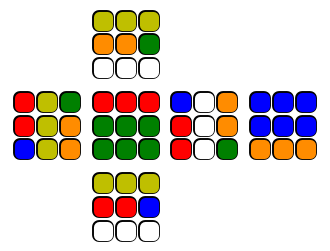

In [18]:
cube = Cube()
cube.apply_moves("U S B B")

cube.plot()

background_path = "usbb0.png"
foreground_image = cube_to_minecraft(cube)
output_path = fr"skin_solve\usbb_USBB.png"

# Call the function to paste the image onto the background
paste_image_onto_background(background_path, foreground_image, output_path=output_path)

# solution = "R' D L D2 y' R' F R U r' U' R U M' U' R U R' U F' U' F U2 L' U L U' L' U' L U"

# for i,move in enumerate(solution.split(" ")):
#     cube.apply_moves(move)
#     background_path = "usbb0.png"
#     foreground_image = cube_to_minecraft(cube)
#     output_path = fr"skin_solve\usbb{i+1}.png"

#     # Call the function to paste the image onto the background
#     paste_image_onto_background(background_path, foreground_image, output_path=output_path)
